# K-means base algo

author: Micael Veríssimo de Araújo (micael.verissimo@lps.ufrj.br)

In [32]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt 

np.random.seed(20)

class base_kmeans(object):
    def __init__(self, n_clusters, seed=13):
        self.seed       = seed
        self.n_clusters = n_clusters

        np.random.seed(self.seed)
        
    def get_n_clusters(self):
        return self.n_clusters
    
    def get_centroids(self):
        return self.centroids
    
    def get_first_centroids(self):
        return self.first_centroids
    
    def get_n_dim(self):
        return self.n_dim
    
    def fit(self, X_data, breg_div='euclidean', n_iter=10, tol=1e-3):
        # begin: initialize the centroids
        self.X          = X_data
        self.breg_div   = breg_div
        self.n_iter     = n_iter
        self.n_dim      = X_data.shape[1]
        self.centroids  = np.random.uniform(low=np.min(self.X, axis=0), high=np.max(self.X,axis=0),
                                            size=(self.n_clusters, self.n_dim))
        #self.F_in       = np.zeros(self.n_clusters)
        self.labels     = None
        print('Begin K-means... ')
        self.first_centroids = self.centroids
        for i_iter in range(n_iter):
            new_centroids = np.zeros_like(self.centroids)
            print('Iteraction: %i' %(i_iter+1))
            print('Calculating the %s divergence between the data and the centroids...' %(self.breg_div))
            if self.breg_div == 'itakura-saito':
                dist = distance.cdist(self.X, self.centroids,
                                      metric=lambda u, v: ((u/v)-np.log(u/v)-1).sum()) 
            elif self.breg_div == 'exp':
                dist = distance.cdist(self.X[:,:self.n_dim], self.centroids,
                                      metric=lambda u, v: (np.exp(u)-np.exp(v)-(u-v)*np.exp(v)).sum())
            else:
                dist = distance.cdist(self.X, self.centroids, metric=self.breg_div)
                
            # Classification Step
            self.labels = np.argmin(dist, axis=1)
            # Renewal Step
            for icluster in range(self.centroids.shape[0]):
                if self.X[self.labels==icluster].shape[0] != 0:
                    new_centroids[icluster] = np.mean(self.X[self.labels==icluster], axis=0)
                else:
                    new_centroids[icluster] = self.centroids[icluster]
            self.centroids = new_centroids

In [46]:
sample1 = np.random.uniform(low=(1, 1), high=(2, 2), size=(10, 2))
sample2 = np.random.uniform(low=(3, 3), high=(6, 6), size=(10, 2))
sample3 = np.random.uniform(low=(7, 7), high=(9, 9), size=(10, 2))
sample  = np.concatenate((sample1, sample2, sample3), axis=0)

In [47]:
sample.shape

(30, 2)

In [48]:
kmeans=base_kmeans(n_clusters=3)
kmeans.fit(sample, breg_div='itakura-saito', n_iter=10)

Begin K-means... 
Iteraction: 1
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 2
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 3
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 4
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 5
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 6
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 7
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 8
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 9
Calculating the itakura-saito divergence between the data and the centroids...
Iteraction: 10
Calculating the itakura-saito divergence between the data and the centroids...


In [49]:
kmeans.get_first_centroids()

array([[7.10860318, 2.79797755],
       [7.47387996, 8.11034613],
       [8.63711111, 4.3730537 ]])

In [50]:
kmeans.get_centroids()

array([[1.32831408, 1.5239574 ],
       [7.98524145, 7.67784467],
       [4.48608098, 4.47762572]])

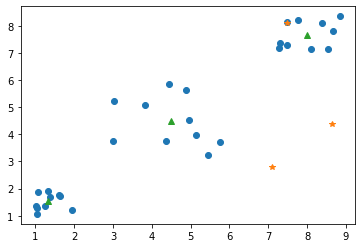

In [51]:
plt.plot(sample[:,0], sample[:,1], 'o')
plt.plot(kmeans.get_first_centroids()[:,0], kmeans.get_first_centroids()[:,1], '*')
plt.plot(kmeans.get_centroids()[:,0], kmeans.get_centroids()[:,1], '^')
plt.show()

In [ ]:
clus_sample = np.random.uniform(low=(1, 5), high=(2, 9), size=(3, 2))

In [ ]:
clus_sample

In [ ]:
dist = distance.cdist(sample, clus_sample, metric=lambda u, v: ((u/v)-np.log(u/v)-1).sum())

In [ ]:
dist

In [ ]:
label = np.argmin(dist, axis=1)
label

In [ ]:
idx = np.argwhere(label==2)
idx

In [ ]:
print(np.mean(sample[label==1],axis=0))

In [ ]:
print(sample[label==2])
print(sample)

In [ ]:
new_clust = np.zeros_like(clus_sample)
for i in range(clus_sample.shape[0]):
    print(i)
    print(distance.cdist(sample[label==i], clus_sample[i,:][np.newaxis],
                                                                      metric=lambda u, v: ((u/v)-np.log(u/v)-1).sum()))
    print('Fin: %1.3f' %(np.sum(distance.cdist(sample[label==i], clus_sample[i,:][np.newaxis],
                                                                      metric=lambda u, v: ((u/v)-np.log(u/v)-1).sum()))))
    new_clust[i,:] = np.mean(sample[label==i], axis=0)
print(new_clust)

In [ ]:
distance.cdist(new_clust, clus_sample,
               metric=lambda u, v: ((u/v)-np.log(u/v)-1).sum())

In [ ]:
new_clust, clus_sample

In [ ]:
np.linalg.det(np.cov(sample, clus_sample))

In [ ]:
np.argmin(dist, axis=1)

In [ ]:
distance.euclidean(sample, clus_sample)#, np.linalg.inv(np.cov(sample, clus_sample)))

In [ ]:
def my_dist(x, y):
    return lambda u, v: np.sqrt(((u-v)**2).sum())

In [ ]:
distance.cdist(sample, clus_sample, lambda u, v: np.sqrt(((u-v)**2).sum()))

In [ ]:
sample

In [ ]:
kmeans=base_kmeans(n_clusters=3)
kmeans.fit(X_data=sample, breg_div='itakura-saito')

In [ ]:
distance.cdist(sample[:,:2], sample[:,:2], metric=lambda u, v: ((u/v)-np.log(u/v)-1).sum())

In [ ]:
dist = distance.cdist(sample, clus_sample, metric=lambda u, v: ((u/v)-np.log(u/v)-1).sum())
print(dist)

In [ ]:
label = np.argmin(dist, axis=1)
label

In [ ]:
label[:,np.newaxis].shape

In [ ]:
sample.shape

In [ ]:
sample = np.concatenate((sample, label[:,np.newaxis]), axis=1)

In [ ]:
clus_sample.shape

In [ ]:
sample[:,:2]

In [ ]:
sample[:,2]

In [ ]:
clus_sample[:,i][np.newaxis].shape

In [ ]:
kmeans = base_kmeans(n_clusters=3)

In [ ]:
kmeans.fit(X_data=sample, breg_div='itakura-saito')